# ASK

Xác định mối tương quan giữa mức lương và số năm kinh nghiệm từ đó giúp dự đoán được mức lương dựa trên số năm kinh nghiệm

# PREPARE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/Salary_dataset.xlsx')

# PROCESS

In [ ]:
df.info() # xác định số dòng số cột, xác định kiểu dữ liệu mỗi cột, kiểm tra duplicated, kiểm tra null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes


In [ ]:
df.dtypes

Unnamed: 0           int64
YearsExperience    float64
Salary               int64
dtype: object

In [ ]:
df.shape

(30, 3)

In [ ]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


In [ ]:
# giá trị tương quan chạy từ -1 đến 1, âm thì tương quan nghịch dương thì tương quan thuận = 0 là k có tương quan
# các giá trị có tính tương quan

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


# ANALYZE

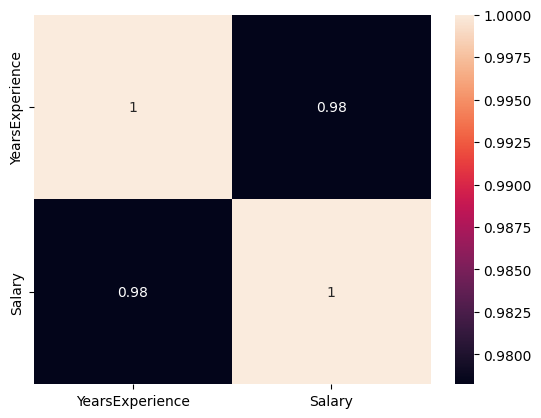

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Giữa YearsExperience và Salary có tính tương quan thuận

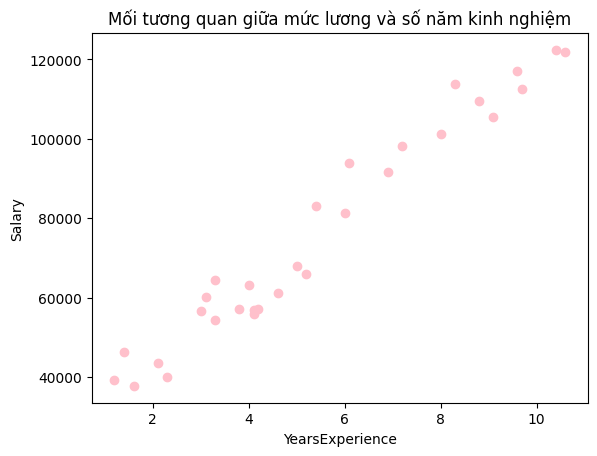

In [ ]:
plt.scatter('YearsExperience','Salary', data = df, color = 'pink') # = plt.scatter(df.YearsExperience, df.Salary, data = df, color = 'pink')
plt.title('Mối tương quan giữa mức lương và số năm kinh nghiệm')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Mức lương có xu hướng tăng theo số năm kinh nghiệm

Chia tập dữ liệu thành 2 biến:
* x = YearsExperience = biến độc lập
* y = Salary = biến phụ thuộc

In [ ]:
x = df['YearsExperience'] # = x = df.iloc[:,:-1] # i = index loc = location, (rows, columns)
print(type(x))
x = pd.DataFrame(x)

<class 'pandas.core.series.Series'>


In [ ]:
print(x)

    YearsExperience
0               1.2
1               1.4
2               1.6
3               2.1
4               2.3
5               3.0
6               3.1
7               3.3
8               3.3
9               3.8
10              4.0
11              4.1
12              4.1
13              4.2
14              4.6
15              5.0
16              5.2
17              5.4
18              6.0
19              6.1
20              6.9
21              7.2
22              8.0
23              8.3
24              8.8
25              9.1
26              9.6
27              9.7
28             10.4
29             10.6


In [ ]:
y = df['Salary']
y = pd.DataFrame(y)

In [ ]:
print(y)

    Salary
0    39344
1    46206
2    37732
3    43526
4    39892
5    56643
6    60151
7    54446
8    64446
9    57190
10   63219
11   55795
12   56958
13   57082
14   61112
15   67939
16   66030
17   83089
18   81364
19   93941
20   91739
21   98274
22  101303
23  113813
24  109432
25  105583
26  116970
27  112636
28  122392
29  121873


In [ ]:
# chia tập dữ liệu thành 2 phần train và test
# pp1 => model 1, pp2 => model 2 -> dựa trên độ chính xác để xác định model tốt nhất

In [ ]:
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # dùng để tách dữ liệu 7:3, tách dữ liệu lấy random, szie 0.3 là lấy 70% để train

In [ ]:
x_train

,YearsExperience
23,8.3
11,4.1
24,8.8
18,6.0
22,8.0
25,9.1
27,9.7
17,5.4
28,10.4
26,9.6


In [ ]:
print(x_train.shape)

(21, 1)


Thực hiện phân loại dựa trên hồi quy tuyến tính đơn giản

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# data 70%, từ x_test => y_predict so sánh y_predict và y _test

In [ ]:
model = LinearRegression() # từ x_train, y_train tìm ra model
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(x_test) # dùng x_test để tìm y_predict
y_predict

array([[92209.871593  ],
       [81438.48595385],
       [70667.1003147 ],
       [52061.97966525],
       [35415.29276838],
       [72625.53406727],
       [54020.41341782],
       [62833.3653044 ],
       [33456.8590158 ]])

In [ ]:
# nếu 2 giá trị predict và actual bằng nhau thì sẽ bị overfitting vìa predict và actual k bao h bằng nhau

In [ ]:
x_predict=model.predict(x_train)
x_predict

array([[102981.25723216],
       [ 61854.14842812],
       [107877.34161359],
       [ 80459.26907756],
       [100043.6066033 ],
       [110814.99224245],
       [116690.29350017],
       [ 74583.96781984],
       [123544.81163418],
       [115711.07662388],
       [ 89272.22096414],
       [ 42269.81090238],
       [ 54020.41341782],
       [ 37373.72652095],
       [ 51082.76278896],
       [ 44228.24465496],
       [ 58916.49779926],
       [ 66750.23280955],
       [125503.24538675],
       [ 61854.14842812],
       [ 60874.93155183]])

In [ ]:
# y = ax+b
# a = model.intercept
# b = model.coef
print(model.intercept_)
print(model.coef_)

[21706.25650036]
[[9792.16876287]]


Tạo Dataframe cho thực tế và dự đoán

In [ ]:
y_predict = y_predict.flatten()
# vì df chỉ tạo được bảng 1 chiều trong khi y_predict và y_test
# là 2 chiều nên phải dùng flatten() để chuyển thành 1 chiều
y_test = y_test.values.flatten()
new_df=pd.DataFrame({"Actual":y_test,"Predict":y_predict})
new_df

,Actual,Predict
0,98274,92209.871593
1,93941,81438.485954
2,67939,70667.100315
3,60151,52061.979665
4,46206,35415.292768
5,66030,72625.534067
6,64446,54020.413418
7,57082,62833.365304
8,39344,33456.859016


# SHARE

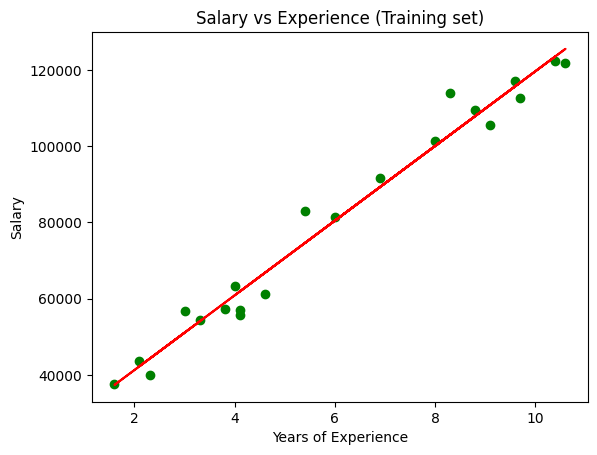

In [ ]:
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, x_predict, color = 'red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

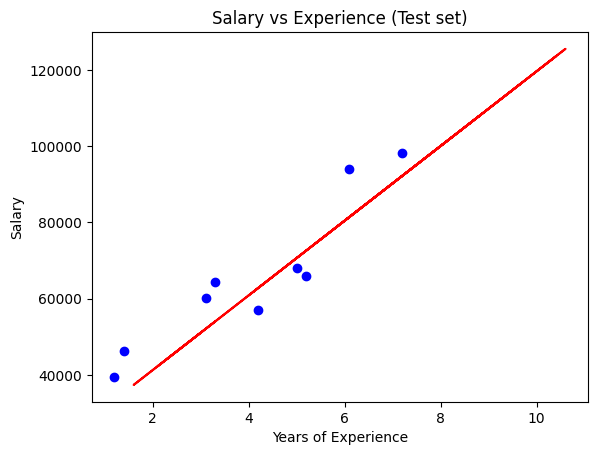

In [ ]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, x_predict, color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# CHECK

In [ ]:
model.score(x_train,y_train)

0.9763264213537755

In [ ]:
model.score(x_test, y_test)

0.8021598080899652

# ASK